In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


In [5]:
df = pd.read_csv('/kaggle/input/star-dataset/6 class csv.csv')
l = list(df.columns)
for col in ['Star type', 'Star color', 'Spectral Class']: l.remove(col)
X_df = df[l]
Y_df = df['Star type']



In [73]:
x_train, x_test, y_train, y_test = train_test_split(X_df, Y_df)
print('Training data: ', x_train.shape, y_train.shape)
print('Training data: ', x_test.shape, y_test.shape)
print(x_train)

Training data:  (180, 4) (180,)
Training data:  (60, 4) (60,)
     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)
102            23000      127000.00000      36.00000                   -5.76
86             12010           0.00078       0.00920                   12.13
36              6757           1.43000       1.12000                    2.41
9               2700           0.00018       0.13000                   16.05
204            18340           0.00134       0.01240                   11.22
..               ...               ...           ...                     ...
76              2890           0.00340       0.24000                   13.46
166            19923      152000.00000      73.00000                   -5.69
62              2983           0.00024       0.09400                   16.09
119             3780      200000.00000    1324.00000                  -10.70
209            19360           0.00125       0.00998                   11.62

[180 rows x 4

Temperature (K)           7723.00000
Luminosity(L/Lo)             0.00014
Radius(R/Ro)                 0.00878
Absolute magnitude(Mv)      14.81000
Name: 148, dtype: float64 2
148
Temperature (K)              7723
Luminosity(L/Lo)          0.00014
Radius(R/Ro)              0.00878
Absolute magnitude(Mv)      14.81
Star type                       2
Star color                  White
Spectral Class                  A
Name: 148, dtype: object


<AxesSubplot:>

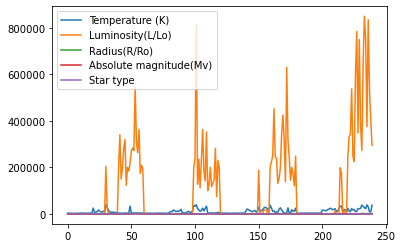

In [94]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
y_hat
print(x_test.iloc[0], y_test.iloc[0])
print(x_test.index[0])
print(df.iloc[x_test.index[0]])
df.plot()

In [79]:
from sklearn.metrics import classification_report

In [81]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.83      0.38      0.53        13
           1       0.38      0.83      0.53         6
           2       0.80      0.73      0.76        11
           3       0.73      0.73      0.73        11
           4       0.50      0.67      0.57         9
           5       0.62      0.50      0.56        10

    accuracy                           0.62        60
   macro avg       0.65      0.64      0.61        60
weighted avg       0.68      0.62      0.62        60

